# Transmission of Air with $O_2$ absorption
==============================================================


The purpose is to calculate the transmission of air due to $O_3$ component at OHP site.

- author : Sylvie Dagoret-Campagne
- date :May  2nd 2017
- Update May 6th 2017

$O_3$ from Hitran and O3 from LibRadtran/CRS

In [6]:
import numpy as np
import pandas as pd

# Set up matplotlib and use a nicer set of plot parameters
#%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt

%matplotlib inline

#import matplotlib as mpl

In [7]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [8]:
import os

In [9]:
from netCDF4 import Dataset

In [10]:
from spacepy import pycdf
import datetime

os.environ["CDF_LIB"]='/Users/dagoret-campagnesylvie/MacOsX/External/cdf/cdf/lib'
os.environ["CDF_LIB"]='/Users/dagoret-campagnesylvie/MacOsX/External/netcdf/lib'

# Initialisation

## Constants

In [11]:
Pa_to_Atm = 0.00000986923267
hPa_to_Atm=Pa_to_Atm*100  # libRadTran provides pressure in hPa
Atm_to_Pa = 1.01325*1e5 
Atm_to_hPa = 1.01325*1e3 

In [12]:
m_to_cm=100.

In [13]:
!ls libradtran_data

UVSPEC.O2A.afglms.cdf crs


In [14]:
path='libradtran_data'

In [15]:
ls /Users/dagoret-campagnesylvie/MacOsX/LSST/softs/libRadtran-2.0.1/data/correlated_k/reptran | grep O3

reptran_solar_coarse.lookup.O3.cdf
reptran_solar_envisat.lookup.O3.cdf
reptran_solar_ers.lookup.O3.cdf
reptran_solar_fine.lookup.O3.cdf
reptran_solar_medium.lookup.O3.cdf
reptran_solar_msg.lookup.O3.cdf
reptran_solar_sentinel.lookup.O3.cdf
reptran_thermal_coarse.lookup.O3.cdf
reptran_thermal_earthcare.lookup.O3.cdf
reptran_thermal_envisat.lookup.O3.cdf
reptran_thermal_ers.lookup.O3.cdf
reptran_thermal_fine.lookup.O3.cdf
reptran_thermal_landsat.lookup.O3.cdf
reptran_thermal_medium.lookup.O3.cdf
reptran_thermal_msg.lookup.O3.cdf
reptran_thermal_sentinel.lookup.O3.cdf


In [16]:
file_O2_list= ['UVSPEC.O2A.afglms.cdf']

## Test pycdf

In [17]:
fullfilename=os.path.join(path,file_O2_list[0])

In [18]:
print fullfilename

libradtran_data/UVSPEC.O2A.afglms.cdf


## try opening with pycdf

- failed because this cdf format is not recognized

In [19]:
#cdf = pycdf.CDF(fullfilename)

## try opening with netcdf

### O3 files

In [20]:
fh = Dataset(fullfilename, mode='r')

In [21]:
fh

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): nlev(50), nlyr(49), nwvl(27500)
    variables(dimensions): float64 wvlmin(), float64 wvlmax(), float64 z(nlev), float64 wvl(nwvl), float32 tau(nlyr,nwvl)
    groups: 

In [22]:
print fh.dimensions.keys()

[u'nlev', u'nlyr', u'nwvl']


In [23]:
print fh.dimensions['nwvl']

<type 'netCDF4._netCDF4.Dimension'>: name = 'nwvl', size = 27500



In [26]:
print fh.dimensions['nlev']

<type 'netCDF4._netCDF4.Dimension'>: name = 'nlev', size = 50



In [25]:
print fh.dimensions['nlyr']

<type 'netCDF4._netCDF4.Dimension'>: name = 'nlyr', size = 49



In [27]:
print fh.variables.keys()

[u'wvlmin', u'wvlmax', u'z', u'wvl', u'tau']


In [28]:
print fh.variables['wvl']

<type 'netCDF4._netCDF4.Variable'>
float64 wvl(nwvl)
    long_name: wavelength
    units: nm
unlimited dimensions: 
current shape = (27500,)
filling off



In [29]:
print fh.variables['z']

<type 'netCDF4._netCDF4.Variable'>
float64 z(nlev)
    long_name: altitude
    units: km
unlimited dimensions: 
current shape = (50,)
filling off



In [30]:
print fh.variables['tau']

<type 'netCDF4._netCDF4.Variable'>
float32 tau(nlyr, nwvl)
    long_name: optical thickness
    units: 
unlimited dimensions: 
current shape = (49, 27500)
filling off



In [31]:
wvl = fh.variables['wvl'][:]
z = fh.variables['z'][:]
tau = fh.variables['tau'][:]

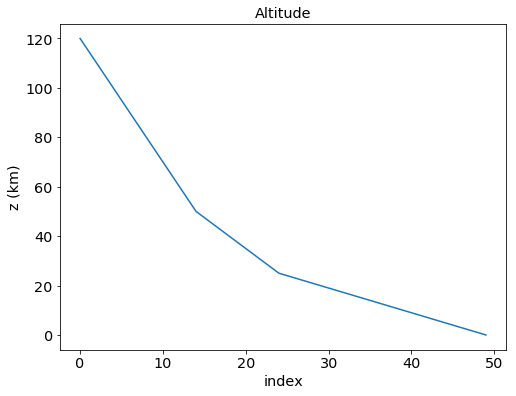

In [36]:
plt.plot(z)
plt.title('Altitude')
plt.xlabel('index')
plt.ylabel('z (km)')

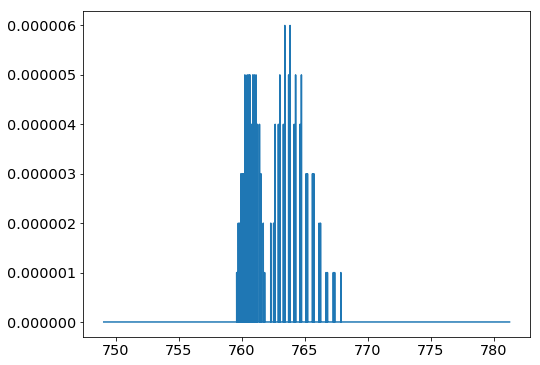

In [33]:
plt.plot(wvl,tau[0,:])

### Combined files

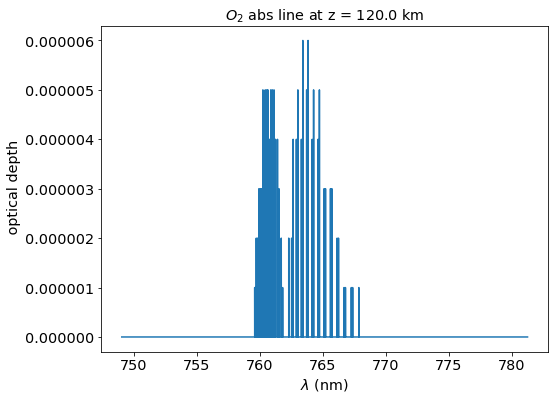

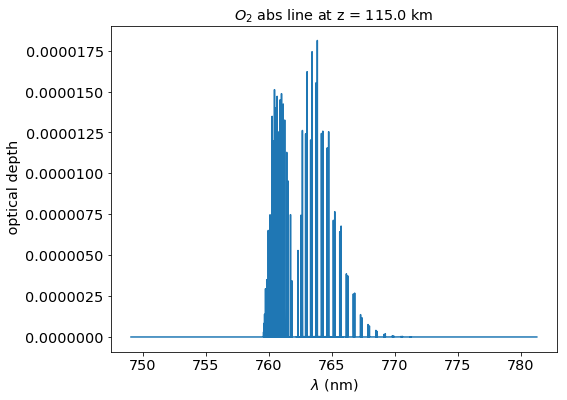

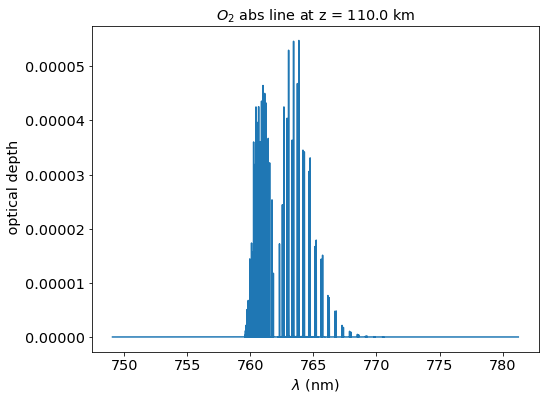

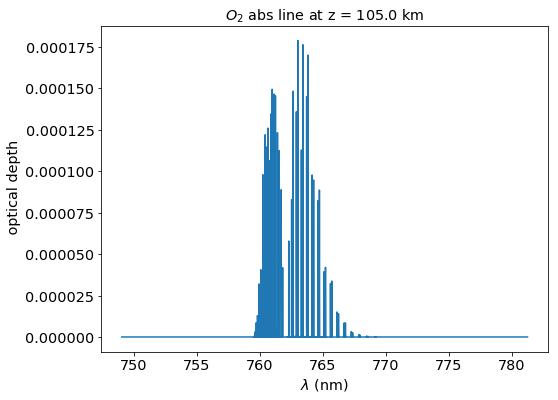

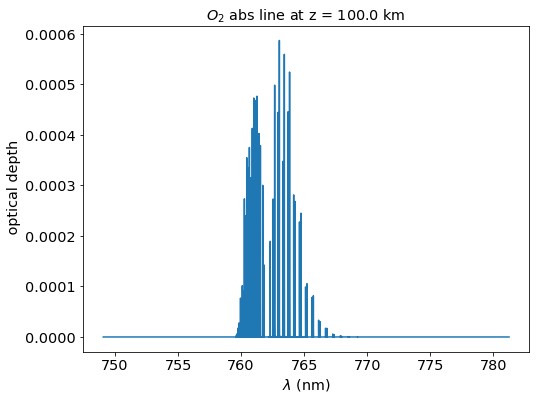

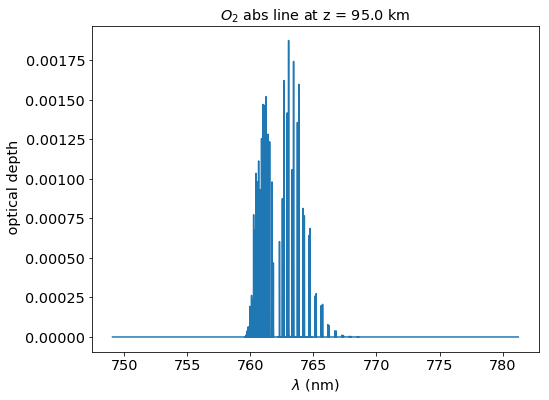

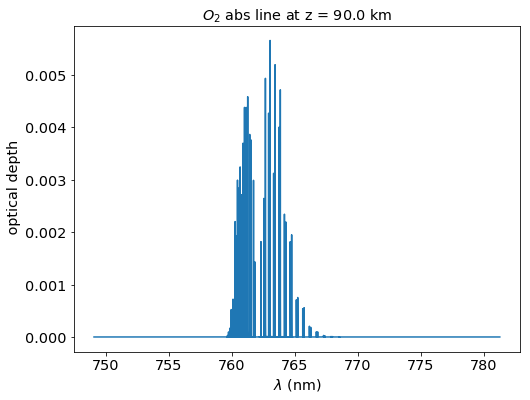

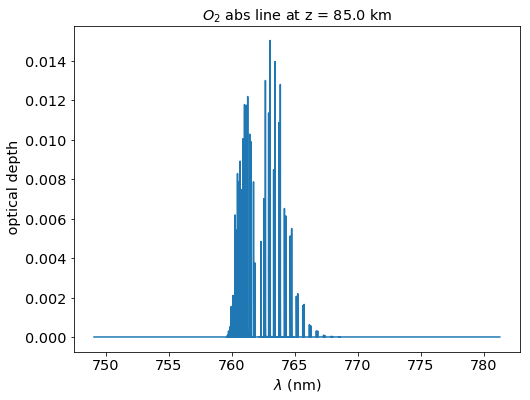

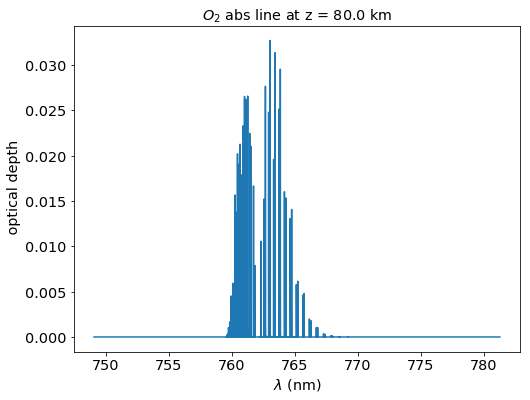

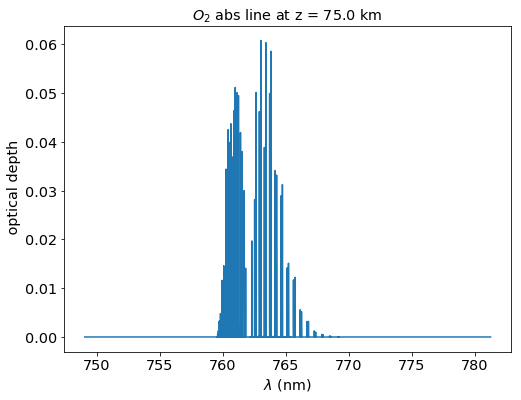

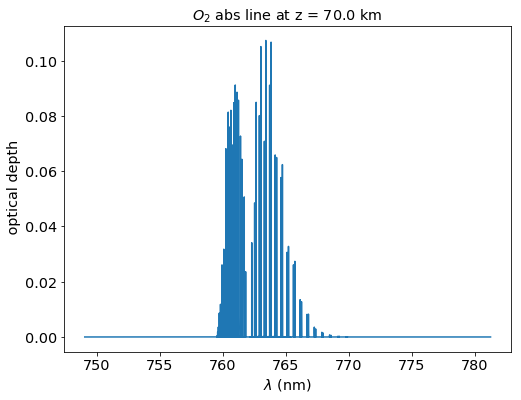

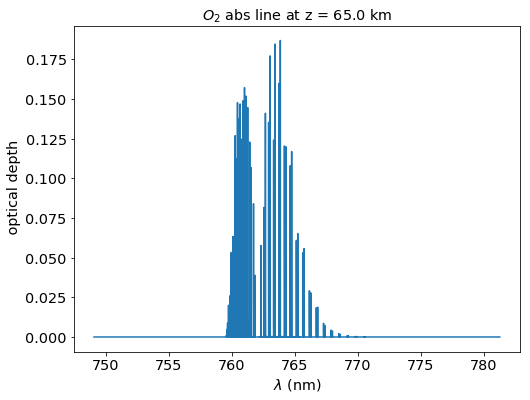

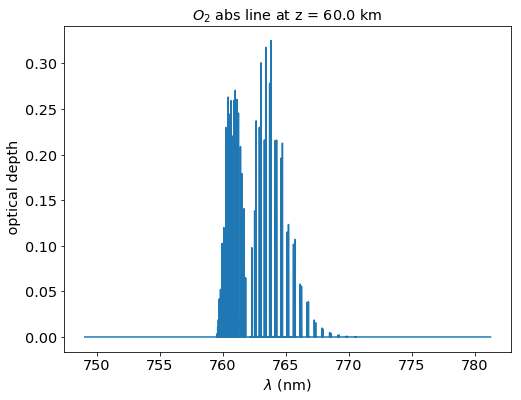

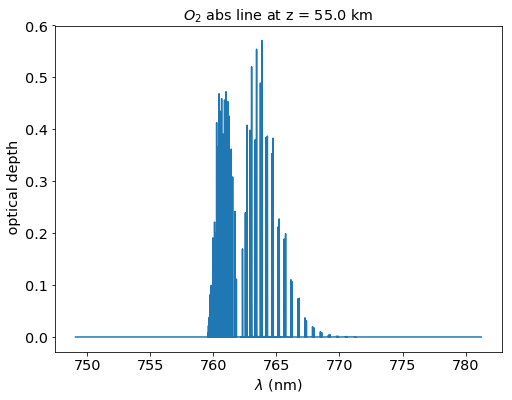

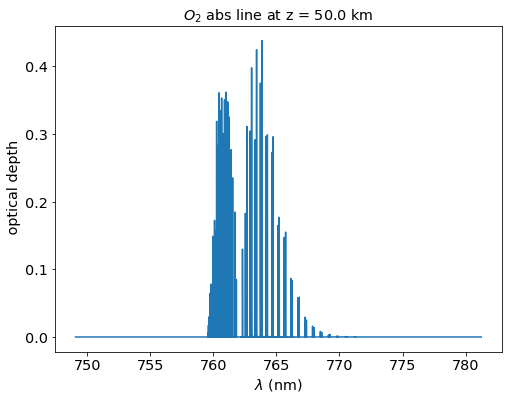

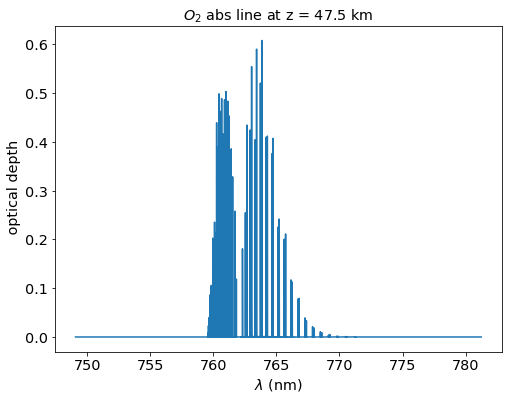

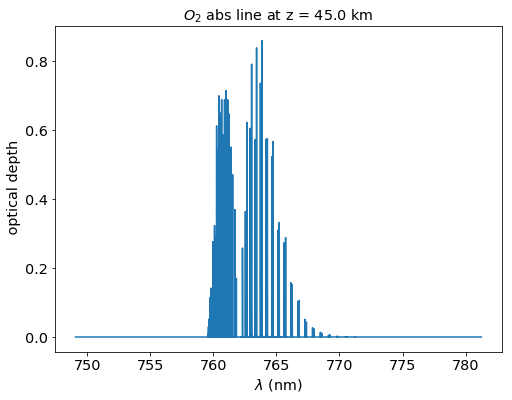

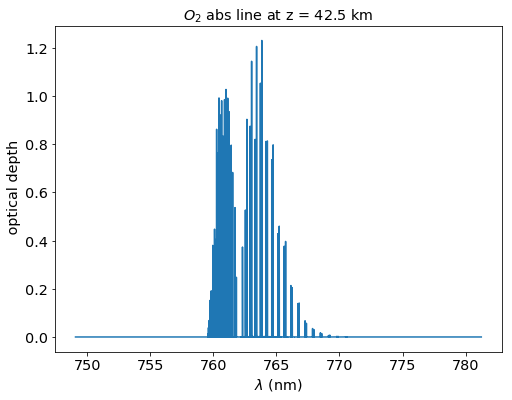

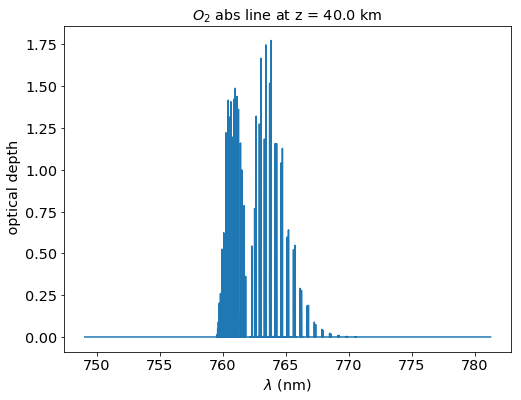

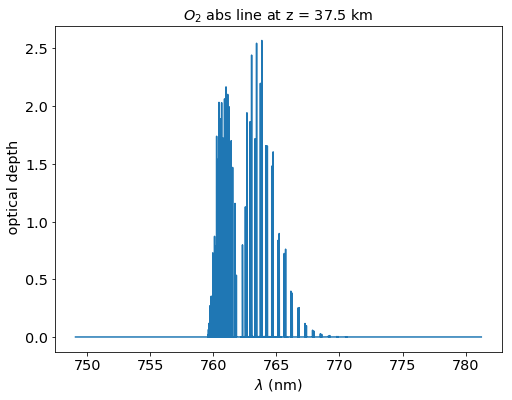

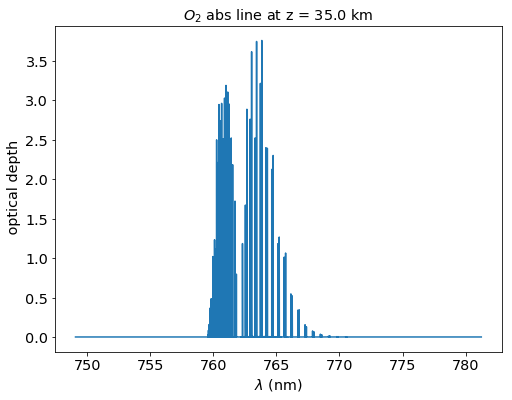

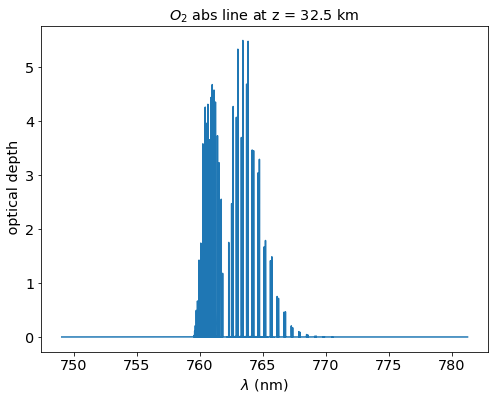

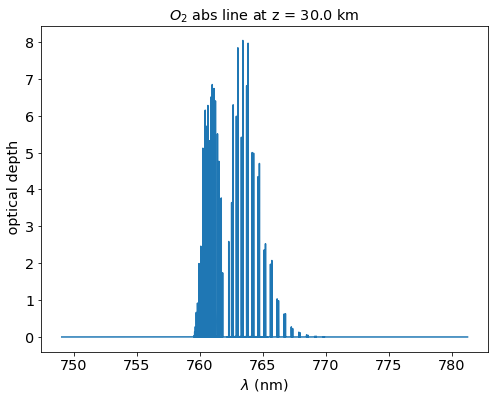

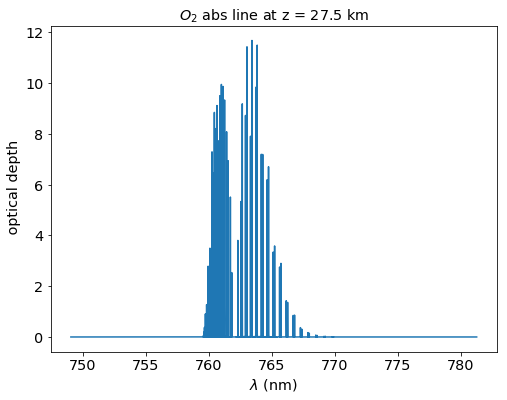

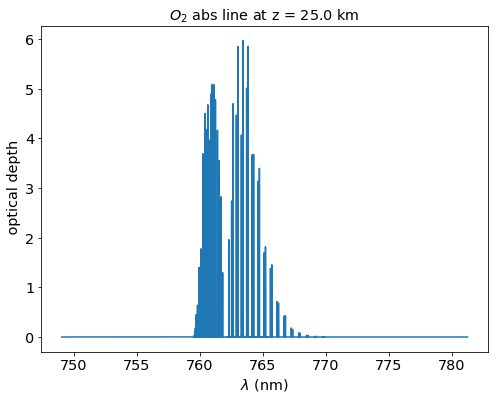

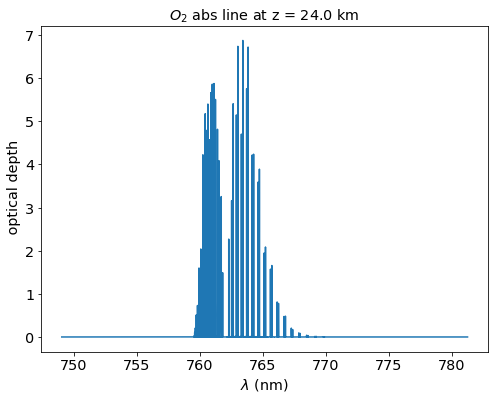

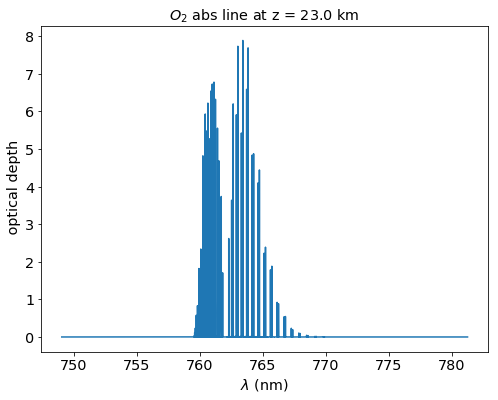

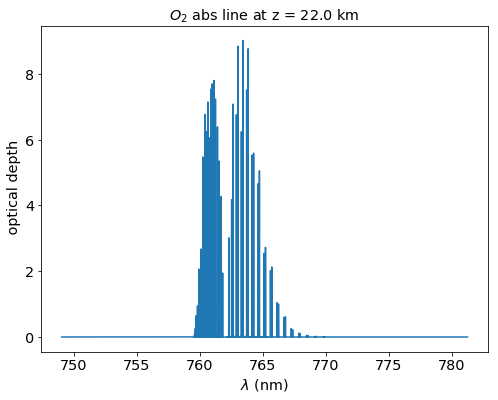

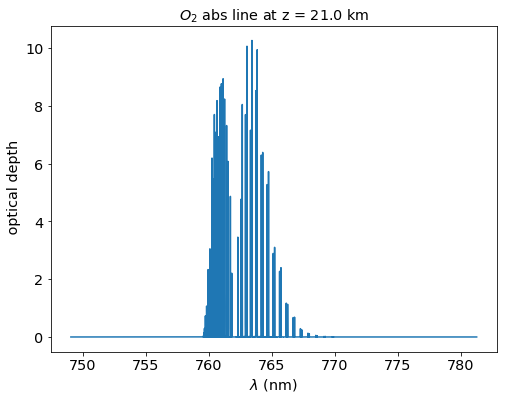

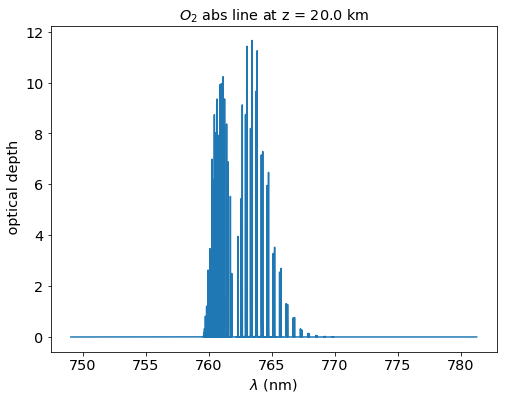

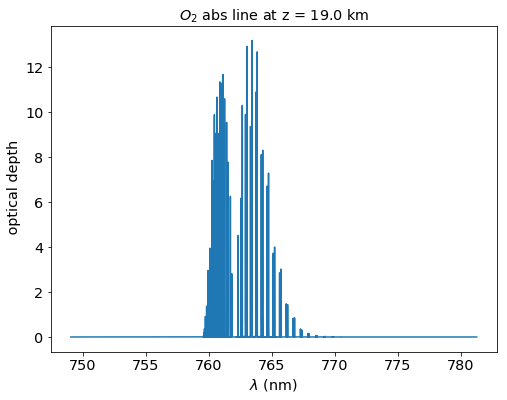

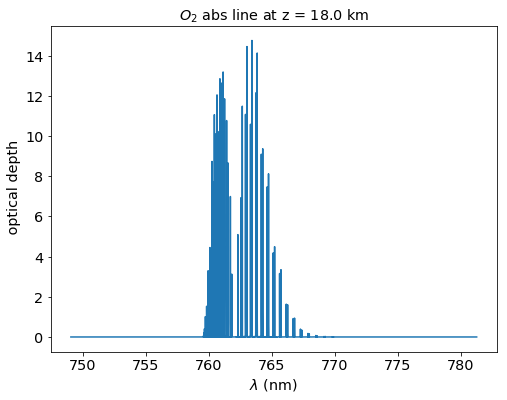

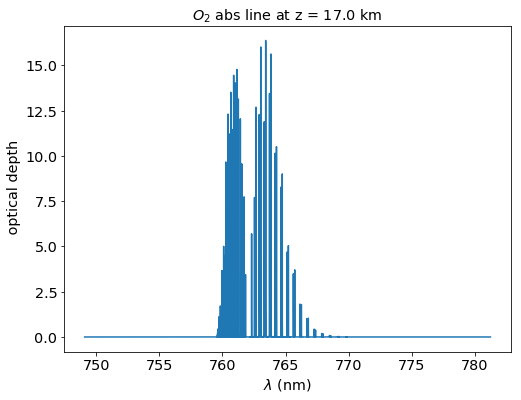

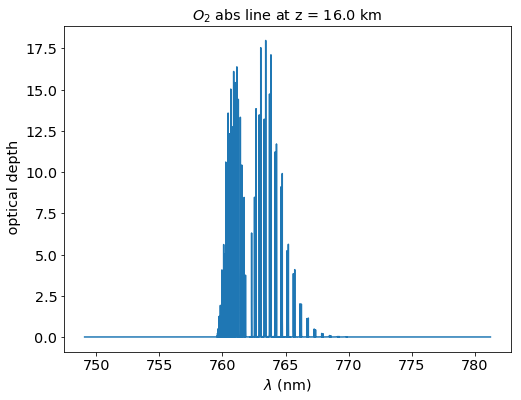

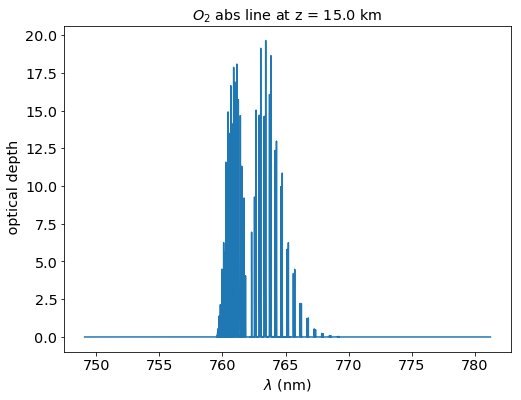

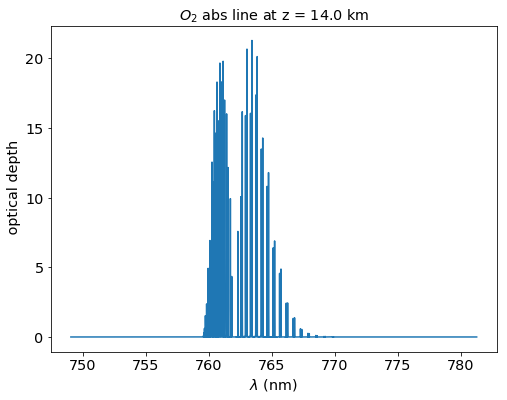

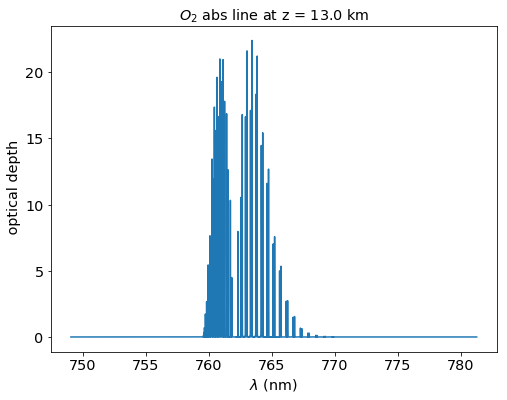

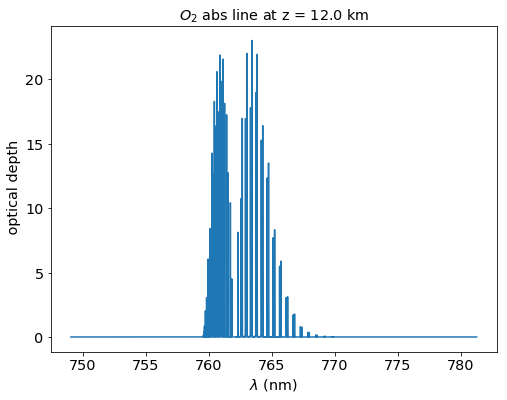

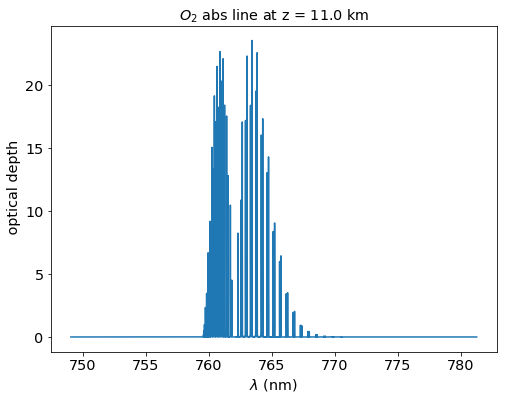

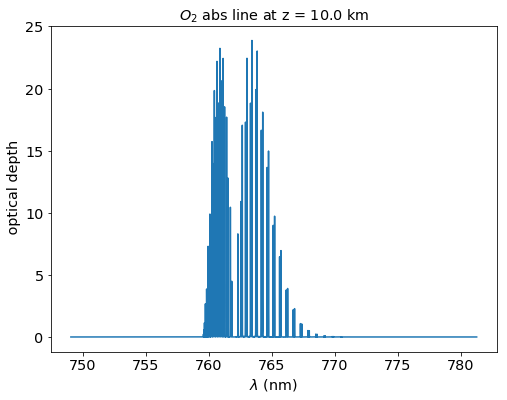

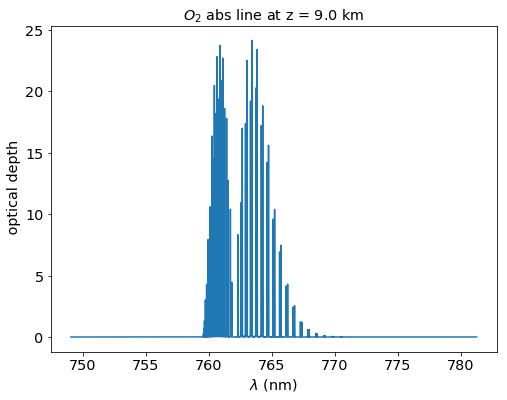

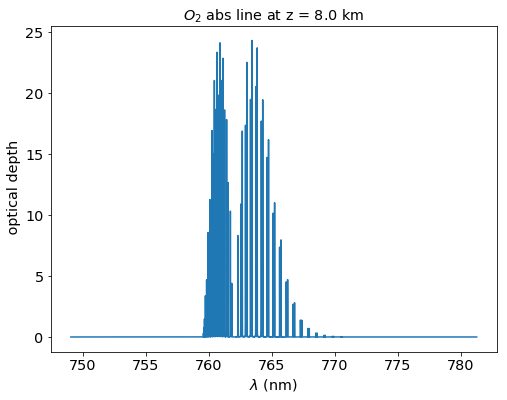

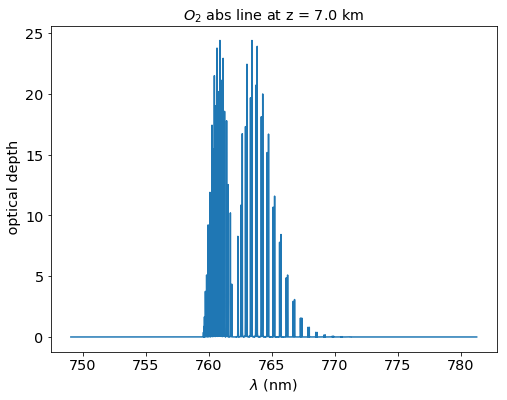

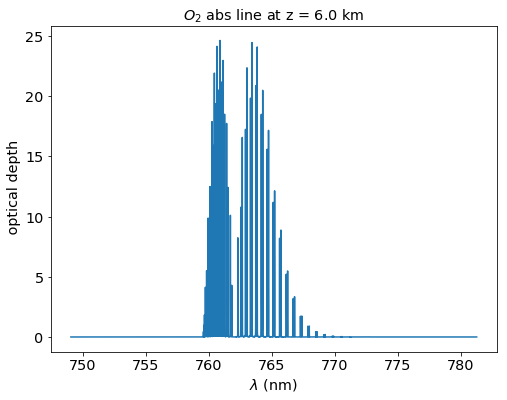

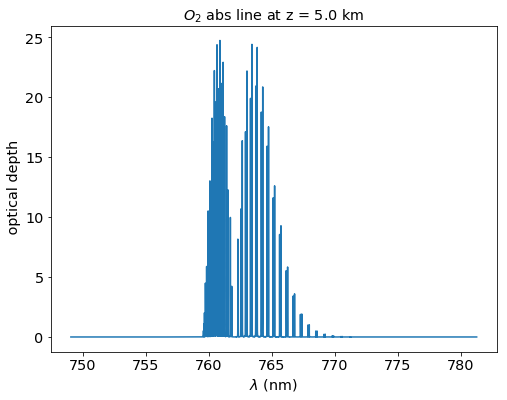

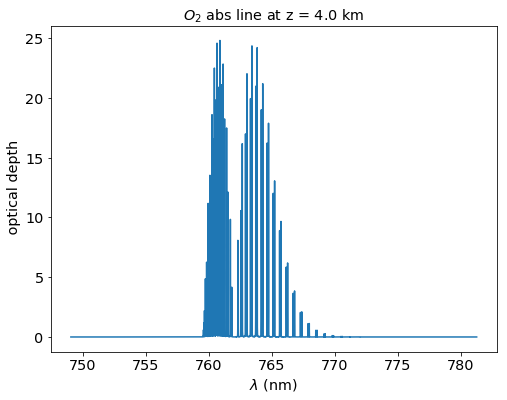

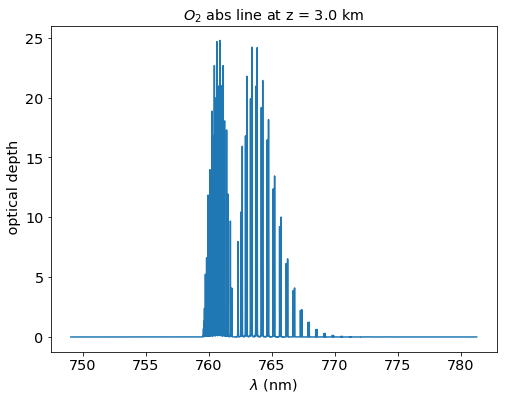

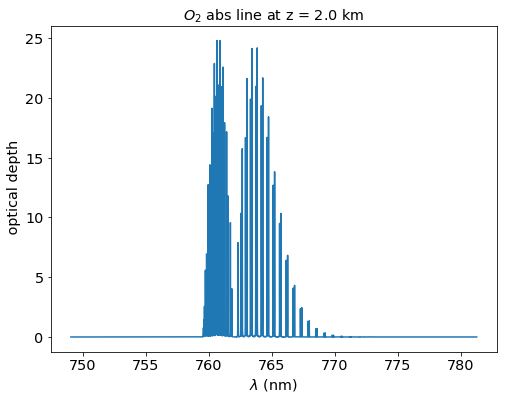

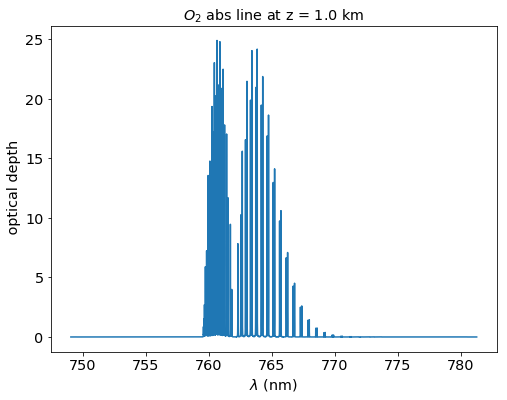

In [37]:
for i in np.arange(0,49):
    plt.figure()
    plt.plot(wvl,tau[i,:])
    title='$O_2$ abs line at z = {} km'.format(z[i])
    plt.title(title)
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel(' optical depth')